# Análisis Exploratorio de Datos (EDA) para RAWG Games

Objetivo: inspeccionar calidad, distribuciones y relaciones de las variables principales, incluyendo todas las features de diseño.

# Conexión a la base de datos y consultas SQL enriquecidas

In [24]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, text
import pandas as pd
import numpy as np

In [2]:
# Cargar variables de entorno desde el archivo .env
load_dotenv()

# Obtener variables de entorno
DB_USER = os.getenv('DB_USER')
DB_PASS = os.getenv('DB_PASS')
DB_HOST = os.getenv('DB_HOST')
DB_PORT = os.getenv('DB_PORT')
DB_NAME = os.getenv('DB_NAME')

In [3]:
# Construir la URL de conexión
database_url = f"postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# Crear el engine
engine = create_engine(database_url)

# Verificar conexión (opcional)
try:
    with engine.connect() as conn:
        conn.execute(text("SELECT 1"))
    print("Conexión exitosa a la base de datos")
except Exception as e:
    print(f"Error de conexión: {e}")

Conexión exitosa a la base de datos


## Porcentaje de nulos por feature de entrenamiento

In [ ]:
sql_nulls = '''
WITH base_stats AS (
  SELECT COUNT(*) as total_games FROM games
),
coverage_stats AS (
  SELECT 
    'rating' as variable,
    COUNT(rating) as no_nulos,
    ROUND((100.0 * COUNT(rating) / (SELECT total_games FROM base_stats))::numeric, 2) as "%_cobertura",
    ROUND((100.0 * (1 - COUNT(rating)::float / (SELECT total_games FROM base_stats)))::numeric, 2) as "%_nulos"
  FROM games
  UNION ALL
  SELECT 
    'ratings_count',
    COUNT(ratings_count),
    ROUND((100.0 * COUNT(ratings_count) / (SELECT total_games FROM base_stats))::numeric, 2),
    ROUND((100.0 * (1 - COUNT(ratings_count)::float / (SELECT total_games FROM base_stats)))::numeric, 2)
  FROM games
  UNION ALL
  SELECT 
    'metacritic',
    COUNT(metacritic),
    ROUND((100.0 * COUNT(metacritic) / (SELECT total_games FROM base_stats))::numeric, 2),
    ROUND((100.0 * (1 - COUNT(metacritic)::float / (SELECT total_games FROM base_stats)))::numeric, 2)
  FROM games
  UNION ALL
  SELECT 
    'playtime (estimated_hours)',
    COUNT(playtime),
    ROUND((100.0 * COUNT(playtime) / (SELECT total_games FROM base_stats))::numeric, 2),
    ROUND((100.0 * (1 - COUNT(playtime)::float / (SELECT total_games FROM base_stats)))::numeric, 2)
  FROM games
  UNION ALL
  SELECT 
    'released (planned_year)',
    COUNT(released),
    ROUND((100.0 * COUNT(released) / (SELECT total_games FROM base_stats))::numeric, 2),
    ROUND((100.0 * (1 - COUNT(released)::float / (SELECT total_games FROM base_stats)))::numeric, 2)
  FROM games
  UNION ALL
  SELECT 
    'esrb_rating_id',
    COUNT(esrb_rating_id),
    ROUND((100.0 * COUNT(esrb_rating_id) / (SELECT total_games FROM base_stats))::numeric, 2),
    ROUND((100.0 * (1 - COUNT(esrb_rating_id)::float / (SELECT total_games FROM base_stats)))::numeric, 2)
  FROM games
  UNION ALL
  SELECT 
    'reviews_text_count',
    COUNT(reviews_text_count),
    ROUND((100.0 * COUNT(reviews_text_count) / (SELECT total_games FROM base_stats))::numeric, 2),
    ROUND((100.0 * (1 - COUNT(reviews_text_count)::float / (SELECT total_games FROM base_stats)))::numeric, 2)
  FROM games
  UNION ALL
  SELECT 
    'added',
    COUNT(added),
    ROUND((100.0 * COUNT(added) / (SELECT total_games FROM base_stats))::numeric, 2),
    ROUND((100.0 * (1 - COUNT(added)::float / (SELECT total_games FROM base_stats)))::numeric, 2)
  FROM games
  UNION ALL
  SELECT 
    'suggestions_count',
    COUNT(suggestions_count),
    ROUND((100.0 * COUNT(suggestions_count) / (SELECT total_games FROM base_stats))::numeric, 2),
    ROUND((100.0 * (1 - COUNT(suggestions_count)::float / (SELECT total_games FROM base_stats)))::numeric, 2)
  FROM games
  UNION ALL
  SELECT 
    'reviews_count',
    COUNT(reviews_count),
    ROUND((100.0 * COUNT(reviews_count) / (SELECT total_games FROM base_stats))::numeric, 2),
    ROUND((100.0 * (1 - COUNT(reviews_count)::float / (SELECT total_games FROM base_stats)))::numeric, 2)
  FROM games
  UNION ALL
  SELECT 
    'genres',
    COUNT(DISTINCT gg.id_game),
    ROUND((100.0 * COUNT(DISTINCT gg.id_game) / (SELECT total_games FROM base_stats))::numeric, 2),
    ROUND((100.0 * (1 - COUNT(DISTINCT gg.id_game)::float / (SELECT total_games FROM base_stats)))::numeric, 2)
  FROM games g
  LEFT JOIN game_genres gg ON g.id_game = gg.id_game
  UNION ALL
  SELECT 
    'platforms',
    COUNT(DISTINCT gp.id_game),
    ROUND((100.0 * COUNT(DISTINCT gp.id_game) / (SELECT total_games FROM base_stats))::numeric, 2),
    ROUND((100.0 * (1 - COUNT(DISTINCT gp.id_game)::float / (SELECT total_games FROM base_stats)))::numeric, 2)
  FROM games g
  LEFT JOIN game_platforms gp ON g.id_game = gp.id_game
  UNION ALL
  SELECT 
    'tags',
    COUNT(DISTINCT gt.id_game),
    ROUND((100.0 * COUNT(DISTINCT gt.id_game) / (SELECT total_games FROM base_stats))::numeric, 2),
    ROUND((100.0 * (1 - COUNT(DISTINCT gt.id_game)::float / (SELECT total_games FROM base_stats)))::numeric, 2)
  FROM games g
  LEFT JOIN game_tags gt ON g.id_game = gt.id_game
)
SELECT * FROM coverage_stats
ORDER BY "%_nulos" DESC;
'''

df_nulls = pd.read_sql(text(sql_nulls), engine)
print("=== ANÁLISIS COMPLETO DE FEATURES (EXPANDIDO) ===")
print(df_nulls)

=== ANÁLISIS COMPLETO DE FEATURES (EXPANDIDO) ===
                      variable  no_nulos  %_cobertura  %_nulos
0                   metacritic      7130         0.80    99.20
1               esrb_rating_id     70676         7.94    92.06
2                       genres    676292        76.02    23.98
3                         tags    791375        88.95    11.05
4      released (planned_year)    860517        96.73     3.27
5                    platforms    885423        99.53     0.47
6                reviews_count    889648       100.00     0.00
7           reviews_text_count    889648       100.00     0.00
8                ratings_count    889648       100.00     0.00
9   playtime (estimated_hours)    889646       100.00     0.00
10                      rating    889648       100.00     0.00
11                       added    889648       100.00     0.00
12           suggestions_count    889648       100.00     0.00


# Definición de Éxito en Videojuegos

## Objetivo
Establecer una métrica clara y cuantificable de "éxito" para entrenar nuestro modelo de predicción, basada en datos reales de engagement y calidad percibida por los usuarios.

## Metodología de Clasificación

### Variables Utilizadas
- **`rating`**: Puntuación promedio del juego (escala 0-5)
- **`ratings_count`**: Número total de usuarios que han valorado el juego

### Criterios de Éxito

#### **Éxito Alto**
- **Justificación**: 
  - Alta calidad percibida (rating ≥ 4.0/5)
  - Amplio reconocimiento (≥100 valoraciones)
  - Representa juegos que son tanto buenos como populares

#### **Éxito Moderado**
- **Justificación**:
  - Buena calidad percibida (rating ≥ 3.5/5)
  - Reconocimiento moderado (≥50 valoraciones)
  - Juegos sólidos con base de usuarios establecida

#### **Éxito Bajo**
- **Justificación**:
  - Calidad aceptable (rating ≥ 3.0/5) **O**
  - Mínimo engagement (≥10 valoraciones)
  - Incluye juegos nicho o emergentes

#### **Sin Éxito**
- **Justificación**:
  - Baja calidad percibida **Y**
  - Muy poco engagement
  - Juegos que no lograron tracción en el mercado

## Ventajas de esta Clasificación

### **Combina Calidad y Popularidad**
- No basta con tener buen rating si nadie lo conoce
- No basta con ser popular si la calidad es baja
- Balance entre ambos factores

### **Escalabilidad**
- Los umbrales pueden ajustarse según el mercado
- Permite análisis granular por categorías
- Facilita la interpretación de resultados


## Aplicación en el Modelo

Esta clasificación será nuestra **variable target** para entrenar el modelo de machine learning, permitiendo predecir la categoría de éxito basándose únicamente en las features que puede proporcionar un diseñador antes del lanzamiento.

In [ ]:
# Definir qué consideramos "éxito" basado en rating y ratings_count
sql_success_analysis = '''
SELECT 
  CASE 
    WHEN rating >= 4.0 AND ratings_count >= 100 THEN 'Éxito alto'
    WHEN rating >= 3.5 AND ratings_count >= 50 THEN 'Éxito moderado'
    WHEN rating >= 3.0 OR ratings_count >= 10 THEN 'Éxito bajo'
    ELSE 'Sin éxito'
  END as categoria_exito,
  COUNT(*) as n_juegos,
  ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM games), 2) as porcentaje
FROM games
WHERE rating IS NOT NULL AND ratings_count IS NOT NULL
GROUP BY categoria_exito
ORDER BY n_juegos DESC;
'''
df_success = pd.read_sql(text(sql_success_analysis), engine)
print("Distribución de éxito:")
print(df_success)

Distribución de éxito:
  categoria_exito  n_juegos  porcentaje
0       Sin éxito    873116       98.14
1      Éxito bajo     13326        1.50
2  Éxito moderado      2100        0.24
3      Alto éxito      1106        0.12


In [ ]:
# Tendencias por año de lanzamiento
sql_temporal = '''
SELECT 
  EXTRACT(YEAR FROM released) as year_released,
  COUNT(*) as n_games,
  ROUND(AVG(rating)::numeric, 2) as avg_rating,
  ROUND(AVG(ratings_count)::numeric, 0) as avg_ratings_count
FROM games
WHERE released IS NOT NULL 
  AND EXTRACT(YEAR FROM released) BETWEEN 2010 AND 2024
GROUP BY EXTRACT(YEAR FROM released)
ORDER BY year_released;
'''
df_temporal = pd.read_sql(text(sql_temporal), engine)
df_temporal

,year_released,n_games,avg_rating,avg_ratings_count
0,2010.0,3892,0.48,21.0
1,2011.0,4330,0.41,19.0
2,2012.0,5392,0.40,19.0
3,2013.0,6345,0.39,20.0
4,2014.0,15348,0.21,8.0
5,2015.0,25868,0.15,6.0
6,2016.0,40201,0.12,4.0
7,2017.0,54533,0.07,2.0
8,2018.0,67908,0.05,2.0
9,2019.0,73700,0.04,1.0


### Principales Conclusiones

1. **Crecimiento explosivo de lanzamientos**  
   - Desde 2010 (~3.9 k juegos) hasta 2022 (~168 k juegos) se aprecia un aumento sostenido del número de títulos.  
   - A partir de 2022–2023 hay un descenso, probablemente por retrasos en lanzamiento o por muestreo incompleto de años muy recientes.

2. **Descenso progresivo del promedio de rating**  
   - En 2010 la media de rating era 0.48 (escala normalizada 0–1), pero baja hasta ~0.01–0.02 en 2020–2022.  
   - Este declive puede deberse a que:  
     - Con más oferta, la atención y duración de las reseñas se diluye.  
     - Muchos juegos nuevos no acumulan suficientes valoraciones para estabilizar su puntuación.

3. **Caída drástica en la cantidad media de valoraciones por juego**  
   - En 2010 cada juego recibía en promedio ~21 valoraciones; en 2018 cae a ~2; en 2021 y 2022 incluso a 0.  
   - Indica que los lanzamientos recientes aún no han tenido tiempo o visibilidad suficiente para ser evaluados por la comunidad.

4. **Implicaciones para el modelo**  
   - **Cuidado con el sesgo temporal**: las métricas de rating y conteo de valoraciones están muy sesgadas por el año de lanzamiento.  
   - Para juegos muy recientes (2022–2024), la falta de ratings disponibles puede conducir a información insuficiente.  
   - **Feature engineering**:  
     - Incluir `release_year` como variable cruda o bucketizar en rangos (`<=2015`, `2016–2019`, `>=2020`).  
     - Crear un indicador binario `has_enough_ratings` (p. ej. `ratings_count >= 10`) para filtrar o ponderar predicciones.

5. **Posibles medidas**  
   - **Filtrar o imputar**: para entrenamiento, considera excluir juegos con `ratings_count` muy bajos (< 5) o tratar estos casos de forma especial.  
   - **Temporal split**: al validar el modelo, usa cortes de tiempo (train en años anteriores, test en años posteriores) para simular despliegue en producción.

> Estas conclusiones permiten comprender cómo evoluciona la calidad y cantidad de datos según el año, y diseñar el preprocesado y la validación del modelo de manera robusta frente a sesgos temporales.

## Juegos por Genero

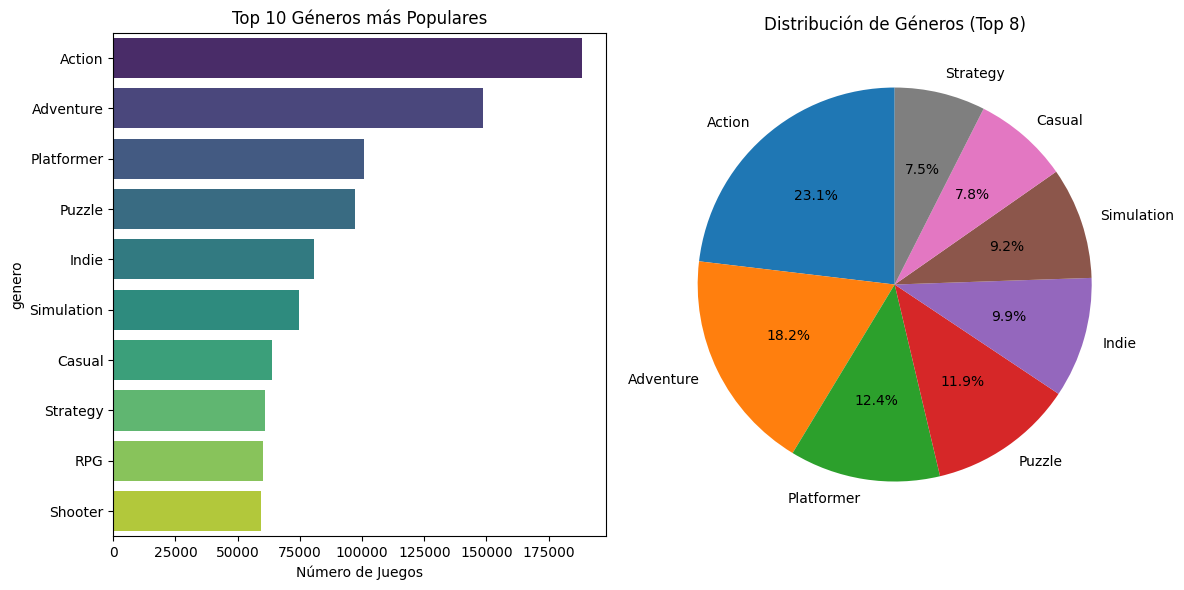

Top 15 Géneros:
         genero  total_juegos  porcentaje
0        Action        188517       17.86
1     Adventure        148520       14.07
2    Platformer        100844        9.55
3        Puzzle         97330        9.22
4         Indie         80723        7.65
5    Simulation         74779        7.08
6        Casual         63898        6.05
7      Strategy         60795        5.76
8           RPG         60361        5.72
9       Shooter         59561        5.64
10       Racing         25549        2.42
11       Arcade         22664        2.15
12       Sports         22348        2.12
13  Educational         15688        1.49
14     Fighting         11764        1.11


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Géneros más populares con nombres y visualización
sql_top_genres = '''
SELECT 
    g.name AS genero,
    COUNT(*) AS total_juegos,
    ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM game_genres), 2) AS porcentaje
FROM game_genres gg
JOIN genres g ON gg.id_genre = g.id_genre
GROUP BY g.id_genre, g.name
ORDER BY total_juegos DESC
LIMIT 15;
'''
df_top_genres = pd.read_sql(text(sql_top_genres), engine)

# Visualizar géneros
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=df_top_genres.head(10), y='genero', x='total_juegos', hue='genero', palette='viridis', legend=False)
plt.title('Top 10 Géneros más Populares')
plt.xlabel('Número de Juegos')

plt.subplot(1, 2, 2)
plt.pie(df_top_genres.head(8)['total_juegos'], labels=df_top_genres.head(8)['genero'], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Géneros (Top 8)')
plt.tight_layout()
plt.show()

print("Top 15 Géneros:")
print(df_top_genres)

## Conclusiones sobre la distribución de géneros (Top 15)

A partir del análisis de los géneros más frecuentes en el dataset, se extraen las siguientes observaciones:

### Observaciones clave

1. **Predominio del género "Action"**  
   El género "Action" representa por sí solo el 17.86 % de todos los juegos, siendo con diferencia el más común. Esto indica que es una categoría central en el mercado y probablemente se combina con otros géneros en muchos títulos.

2. **Alta representación de géneros centrados en la exploración y narrativa**  
   Géneros como "Adventure", "Platformer" y "Puzzle" también muestran una gran presencia, lo que refleja una tendencia hacia experiencias interactivas y de resolución de retos. El género "Indie", aunque más relacionado con el modelo de desarrollo, está fuertemente representado debido a su codificación como género dentro de la base de datos RAWG.

3. **Presencia significativa de juegos de simulación y estrategia**  
   "Simulation", "Casual", "Strategy" y "RPG" superan cada uno el 5 % de representación. Estas categorías suelen estar asociadas a ciclos de vida de jugador más largos, lo cual podría correlacionar con niveles de engagement o éxito percibido.

4. **Géneros de nicho**  
   A partir del puesto 10 (Racing, Arcade, Sports, Educational, Fighting), la frecuencia disminuye drásticamente, quedando por debajo del 2.5 %. Para estos géneros menos frecuentes, podría considerarse agruparlos como "Otros" en ciertas representaciones del modelo, especialmente si se aplican técnicas de one-hot encoding o embeddings.

### Implicaciones para el modelo

- Se puede derivar una variable numérica simple (`n_genres`) por juego, como feature general.
- Si se decide codificar los géneros de forma explícita:
  - Limitar la codificación a los géneros más frecuentes (por ejemplo, top 10 o top 15).
  - O bien emplear embeddings con vocabulario controlado.
- Dado que los géneros están disponibles antes del lanzamiento, constituyen una variable importante para la predicción del éxito futuro del título.

Este análisis ayuda a entender cómo se distribuyen los géneros en el ecosistema de videojuegos, lo que orienta tanto la construcción de features como posibles estrategias de segmentación para diseñadores y desarrolladores.


## Plataformas más populares 

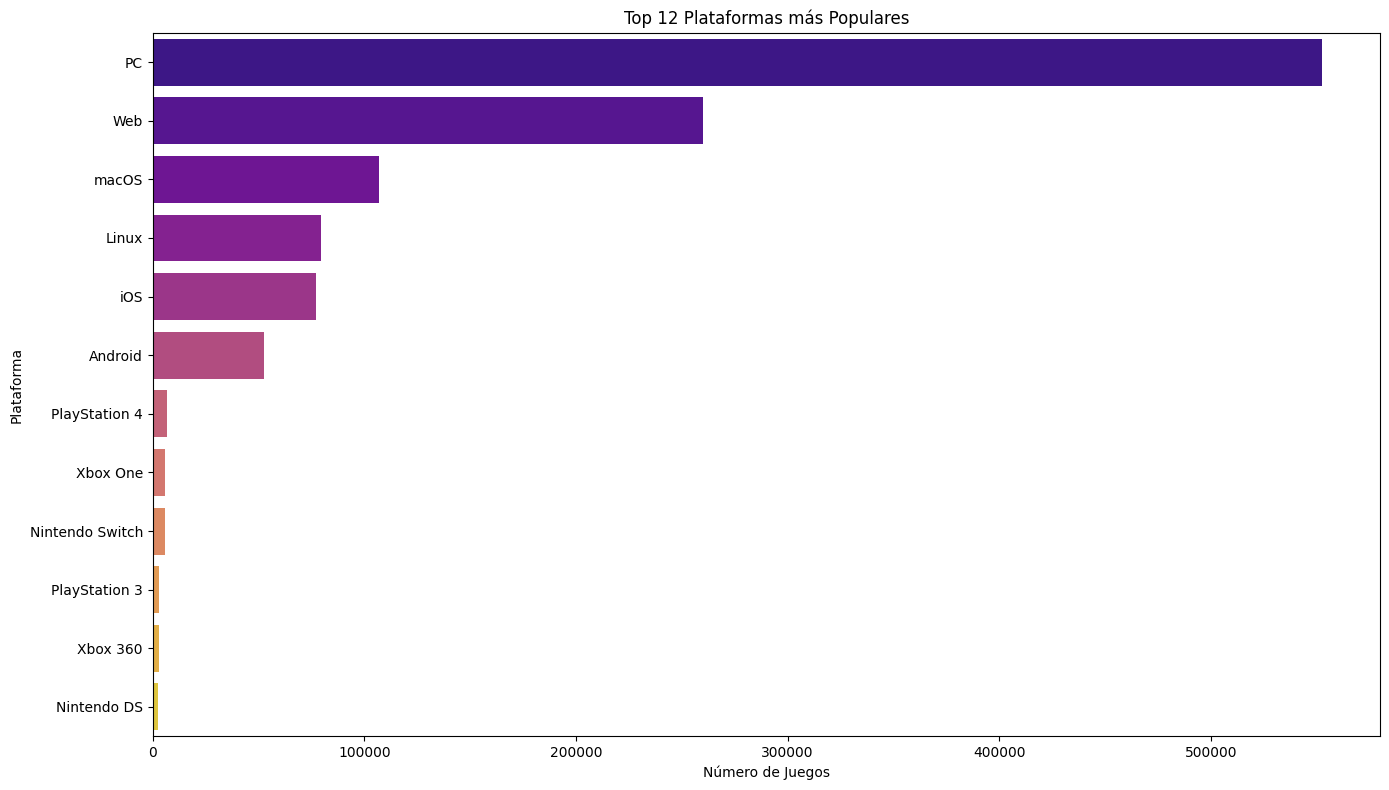

Top 15 Plataformas:
           plataforma  total_juegos  porcentaje
0                  PC        552348       46.72
1                 Web        259999       21.99
2               macOS        106813        9.03
3               Linux         79348        6.71
4                 iOS         77399        6.55
5             Android         52456        4.44
6       PlayStation 4          6927        0.59
7            Xbox One          5701        0.48
8     Nintendo Switch          5655        0.48
9       PlayStation 3          3165        0.27
10           Xbox 360          2806        0.24
11        Nintendo DS          2464        0.21
12                Wii          2198        0.19
13  Commodore / Amiga          2083        0.18
14      PlayStation 2          2065        0.17


In [ ]:

sql_top_platforms = '''
SELECT 
    p.name AS plataforma,
    COUNT(*) AS total_juegos,
    ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM game_platforms), 2) AS porcentaje
FROM game_platforms gp
JOIN platforms p ON gp.id_platform = p.id_platform
GROUP BY p.id_platform, p.name
ORDER BY total_juegos DESC
LIMIT 15;
'''
df_top_platforms = pd.read_sql(text(sql_top_platforms), engine)

# Visualizar plataformas
plt.figure(figsize=(14, 8))
sns.barplot(data=df_top_platforms.head(12), x='total_juegos', y='plataforma', hue='plataforma', palette='plasma', legend=False)
plt.title('Top 12 Plataformas más Populares')
plt.xlabel('Número de Juegos')
plt.ylabel('Plataforma')
plt.tight_layout()
plt.show()

print("Top 15 Plataformas:")
print(df_top_platforms)

## Conclusiones sobre la distribución de plataformas (Top 15)

A partir del análisis de las plataformas más frecuentes en el dataset, se extraen las siguientes conclusiones:

### Observaciones clave

1. **Predominio absoluto del ecosistema PC**  
   Casi la mitad de los juegos (46.72 %) están disponibles en plataforma PC. Esto lo convierte en la plataforma más relevante del dataset tanto para análisis como para predicción.

2. **Importancia de entornos Web y multiplataforma de escritorio**  
   Web representa casi el 22 %, seguida por macOS (9.03 %) y Linux (6.71 %). Esto indica una fuerte tendencia a desarrollos multiplataforma o no dependientes de consolas tradicionales.

3. **Presencia significativa de plataformas móviles**  
   iOS (6.55 %) y Android (4.44 %) están bien representadas, mostrando la importancia del ecosistema móvil, aunque aún lejos del dominio del PC.

4. **Baja representación de consolas**  
   Incluso las consolas modernas como PlayStation 4, Xbox One y Nintendo Switch están por debajo del 0.6 %. Esto puede deberse a una menor visibilidad de títulos exclusivos o a una cobertura parcial por parte del dataset (que puede estar más centrado en juegos indie o multiplataforma).

5. **Plataformas históricas**  
   Aparecen en el top 15 consolas obsoletas como PlayStation 2, Nintendo DS o Commodore/Amiga. Aunque minoritarias, pueden tener interés en análisis de legado o como ruido a filtrar.

### Implicaciones para el modelo

- Se puede derivar una feature `n_platforms` que cuente el número de plataformas por juego.
- Como el campo `platforms` es proporcionado por el diseñador, puede usarse también en forma de multihot encoding o embeddings.
- Si se realiza un one-hot encoding, se recomienda:
  - Limitarlo a las plataformas más frecuentes (por ejemplo, top 10).
  - Agrupar el resto como categoría "otras".
- Es recomendable validar si las combinaciones de plataformas (por ejemplo, "PC + Web") tienen algún peso predictivo relevante en el éxito del juego.

Este análisis refuerza la importancia del PC como canal principal de distribución, pero también revela la necesidad de una codificación controlada para evitar sparsity en el modelo.


## Distribución de géneros por juego

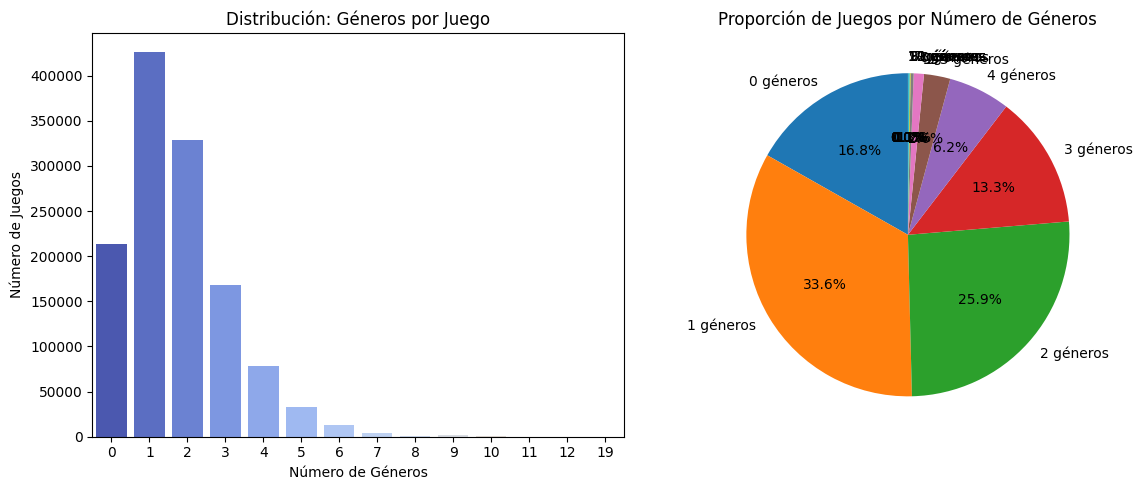

Distribución de géneros por juego:
    n_genres  n_juegos
0          0    213356
1          1    426239
2          2    328966
3          3    168492
4          4     78536
5          5     33395
6          6     12936
7          7      3801
8          8      1344
9          9      1737
10        10       270
11        11        44
12        12        12
13        19        19


In [19]:
sql_genre_distribution = '''
SELECT 
    COUNT(gg.id_genre) AS n_genres,
    COUNT(*) AS n_juegos
FROM games g
LEFT JOIN game_genres gg ON g.id_game = gg.id_game
GROUP BY g.id_game
ORDER BY n_genres;
'''
df_genre_dist = pd.read_sql(text(sql_genre_distribution), engine)

# Agrupar por número de géneros
genre_summary = df_genre_dist.groupby('n_genres')['n_juegos'].sum().reset_index()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=genre_summary, x='n_genres', y='n_juegos', hue='n_genres', palette='coolwarm', legend=False)
plt.title('Distribución: Géneros por Juego')
plt.xlabel('Número de Géneros')
plt.ylabel('Número de Juegos')

plt.subplot(1, 2, 2)
plt.pie(genre_summary['n_juegos'], labels=[f'{int(x)} géneros' for x in genre_summary['n_genres']], 
        autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Juegos por Número de Géneros')
plt.tight_layout()
plt.show()

print("Distribución de géneros por juego:")
print(genre_summary)

## Conclusiones sobre la distribución de número de géneros por juego

El análisis de la variable `n_genres` (número de géneros asociados por juego) muestra la siguiente distribución:

### Observaciones clave

1. **Gran parte de los juegos tienen 1 o 2 géneros**  
   - El 47.9 % de los juegos tienen **exactamente 1 género**.  
   - El 36.9 % tienen **2 géneros**.  
   - Esto confirma que la mayoría de los títulos son clasificados de forma concisa, posiblemente por simplicidad editorial o categorización automática.

2. **Alto número de juegos sin género asignado (n_genres = 0)**  
   - Más de 213 000 juegos (~23.9 %) no tienen ningún género asociado.
   - Esta ausencia puede deberse a:
     - Errores de scraping o falta de categorización en la API.
     - Juegos no publicados o prototipos que no fueron correctamente clasificados.

3. **Casos de múltiples géneros (3 o más)**  
   - A partir de 3 géneros, la frecuencia comienza a disminuir rápidamente.
   - Solo una pequeña fracción (menos del 2 %) tiene más de 5 géneros.
   - Existen casos extremos de juegos con hasta 13 géneros, aunque son anecdóticos.

### Implicaciones para el modelo

- La variable `n_genres` es útil como feature numérica directa, ya que:
  - Captura complejidad temática del juego.
  - Puede tener correlación con el alcance o segmentación del público objetivo.

- Dado el número elevado de juegos sin género asignado:
  - Se recomienda imputar `n_genres = 0` como una categoría válida.
  - Alternativamente, se puede crear una variable binaria `has_genres` para indicar si el juego ha sido etiquetado o no.

- Si en el futuro se usa multihot o embeddings de géneros:
  - Se puede limitar el número de géneros usados como input (por ejemplo, top 3 más frecuentes por juego).

Este análisis evidencia la necesidad de una ingeniería de features robusta en torno al campo de géneros, tanto para captar su valor predictivo como para mitigar la falta de cobertura en una fracción importante del dataset.


## Conteo de Tags por Juego

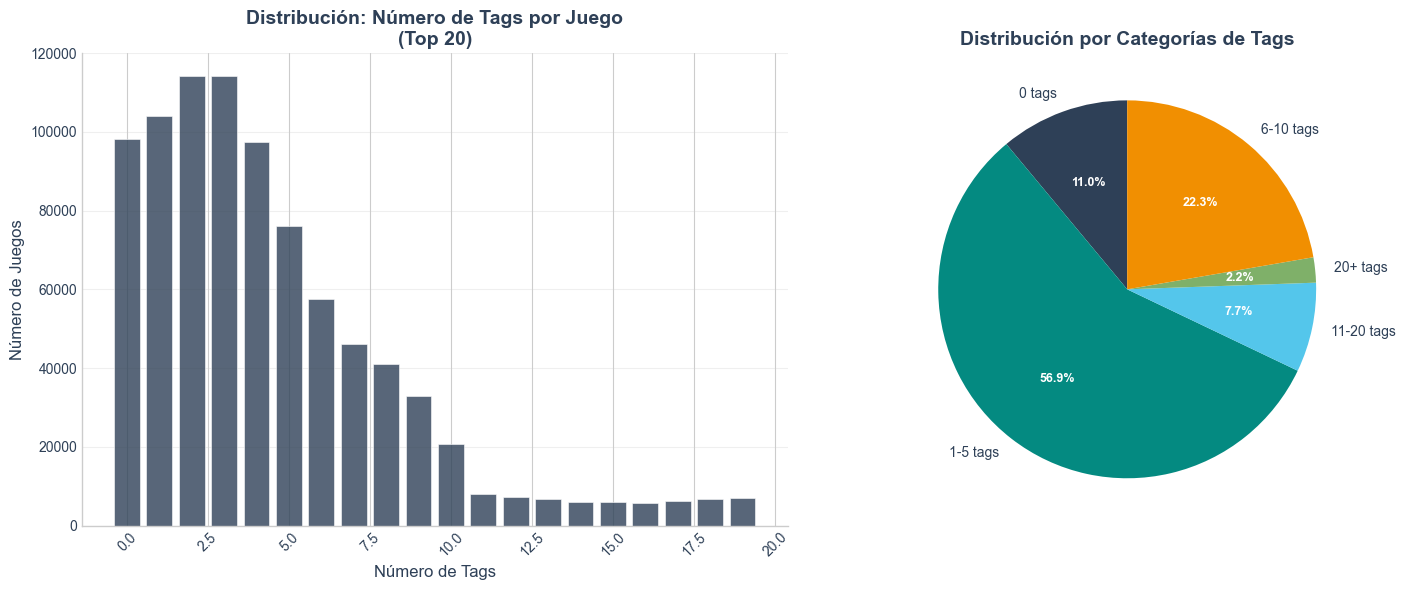


=== ESTADÍSTICAS DETALLADAS ===
Promedio de tags por juego: 5.01
Máximo número de tags: 70
Juegos sin tags: 98,273
Juegos con 20+ tags: 27,623
Total de juegos analizados: 889,648

=== TOP 10 DISTRIBUCIONES MÁS COMUNES ===
   n_tags  n_juegos  porcentaje  categoria
0       0     98273       11.05     0 tags
1       1    104029       11.69   1-5 tags
2       2    114099       12.83   1-5 tags
3       3    114296       12.85   1-5 tags
4       4     97410       10.95   1-5 tags
5       5     76061        8.55   1-5 tags
6       6     57454        6.46  6-10 tags
7       7     46224        5.20  6-10 tags
8       8     40967        4.60  6-10 tags
9       9     32997        3.71  6-10 tags


In [41]:
# Consulta SQL para conteo de tags por juego
sql_tags_per_game = '''
WITH tags_per_game AS (
  SELECT 
    g.id_game,
    COUNT(gt.id_tag) as n_tags
  FROM games g
  LEFT JOIN game_tags gt ON g.id_game = gt.id_game
  GROUP BY g.id_game
)
SELECT 
  n_tags,
  COUNT(*) as n_juegos,
  ROUND((100.0 * COUNT(*) / SUM(COUNT(*)) OVER())::numeric, 2) as porcentaje
FROM tags_per_game
GROUP BY n_tags
ORDER BY n_tags;
'''

df_tags_per_game = pd.read_sql(text(sql_tags_per_game), engine)

# Crear visualizaciones con paleta profesional (solo 2 gráficos)
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo profesional
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Gráfico de barras - Distribución completa (limitado a top 20)
top_20_tags = df_tags_per_game.head(20)
bars1 = axes[0].bar(top_20_tags['n_tags'], top_20_tags['n_juegos'], 
                    color='#2E4057', alpha=0.8, edgecolor='white', linewidth=0.5)
axes[0].set_title('Distribución: Número de Tags por Juego\n(Top 20)', 
                  fontsize=14, fontweight='bold', color='#2E4057')
axes[0].set_xlabel('Número de Tags', fontsize=12, color='#2E4057')
axes[0].set_ylabel('Número de Juegos', fontsize=12, color='#2E4057')
axes[0].grid(axis='y', alpha=0.3, color='#CCCCCC')
axes[0].tick_params(axis='x', rotation=45, colors='#2E4057')
axes[0].tick_params(axis='y', colors='#2E4057')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# 2. Gráfico circular - Categorías agrupadas
def categorize_tags(n_tags):
    if n_tags == 0:
        return '0 tags'
    elif n_tags <= 5:
        return '1-5 tags'
    elif n_tags <= 10:
        return '6-10 tags'
    elif n_tags <= 20:
        return '11-20 tags'
    else:
        return '20+ tags'

df_tags_per_game['categoria'] = df_tags_per_game['n_tags'].apply(categorize_tags)
categoria_summary = df_tags_per_game.groupby('categoria')['n_juegos'].sum().reset_index()

# Paleta profesional
colors_pie = ['#2E4057', '#048A81', '#54C6EB', '#7FB069', '#F18F01']
wedges, texts, autotexts = axes[1].pie(categoria_summary['n_juegos'], 
                                       labels=categoria_summary['categoria'],
                                       autopct='%1.1f%%', 
                                       startangle=90,
                                       colors=colors_pie,
                                       textprops={'fontsize': 10, 'color': '#2E4057'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

axes[1].set_title('Distribución por Categorías de Tags', 
                  fontsize=14, fontweight='bold', color='#2E4057')

plt.tight_layout()
plt.show()

# Mostrar estadísticas detalladas en texto
print("\n=== ESTADÍSTICAS DETALLADAS ===")
total_games = df_tags_per_game['n_juegos'].sum()
weighted_mean = (df_tags_per_game['n_tags'] * df_tags_per_game['n_juegos']).sum() / total_games
max_tags = df_tags_per_game['n_tags'].max()
games_no_tags = df_tags_per_game[df_tags_per_game['n_tags'] == 0]['n_juegos'].iloc[0] if len(df_tags_per_game[df_tags_per_game['n_tags'] == 0]) > 0 else 0
games_many_tags = df_tags_per_game[df_tags_per_game['n_tags'] >= 20]['n_juegos'].sum()

print(f"Promedio de tags por juego: {weighted_mean:.2f}")
print(f"Máximo número de tags: {max_tags}")
print(f"Juegos sin tags: {games_no_tags:,}")
print(f"Juegos con 20+ tags: {games_many_tags:,}")
print(f"Total de juegos analizados: {total_games:,}")

print("\n=== TOP 10 DISTRIBUCIONES MÁS COMUNES ===")
print(df_tags_per_game.head(10))

## Conclusiones sobre la distribución de número de tags por juego

A partir del análisis detallado de la variable `n_tags` (número de etiquetas asociadas a cada juego), se obtienen las siguientes observaciones:

### Estadísticas generales

- **Promedio de tags por juego**: 5.01
- **Máximo número de tags**: 70
- **Juegos sin tags**: 98 273 (11.05 % del total)
- **Juegos con más de 20 tags**: 27 623 (3.10 % del total)
- **Total de juegos analizados**: 889 648

### Observaciones clave

1. **Distribución centrada entre 1 y 5 tags**  
   - Aproximadamente el 57 % de los juegos tienen entre 1 y 5 tags.
   - Esto indica que la mayoría de los títulos tienen una descripción moderada, centrada en los elementos clave del gameplay o estética.

2. **Volumen considerable de juegos sin tags**  
   - Más del 11 % del dataset no tiene ninguna etiqueta asociada.
   - Esto puede reflejar juegos sin categorizar, entradas incompletas en la API o títulos muy recientes o menores que no han sido etiquetados por la comunidad.

3. **Uso intensivo de tags en algunos títulos**  
   - Existen más de 27 000 juegos con más de 20 etiquetas.
   - Este tipo de juegos suele ser altamente descrito, posiblemente debido a su complejidad, popularidad o interacción comunitaria.

4. **Rango útil para ingeniería de features**  
   - El rango de `n_tags` es lo suficientemente amplio como para tratarlo como una variable numérica directa.
   - También puede agruparse en categorías como:
     - 0 tags
     - 1–5 tags
     - 6–10 tags
     - 11–20 tags
     - 20+ tags

### Implicaciones para el modelo

- **Feature `n_tags`**  
  Puede ser usada como variable numérica continua (enteros) o categórica ordinal (rango).
  
- **Tratamiento de nulos**  
  Juegos con `n_tags = 0` deben mantenerse en el modelo, ya que representan un subconjunto significativo. También puede ser útil incorporar un flag `has_tags`.

- **En caso de usar multihot o embeddings de tags**  
  Conviene limitar el vocabulario a los tags más frecuentes (por ejemplo, top 100) y agrupar los poco frecuentes como "otros".

Este análisis demuestra que la variable `n_tags` es un buen descriptor de profundidad semántica del juego y puede aportar valor predictivo si se gestiona correctamente en el preprocesamiento.
